# Experimental Data: Best Estimates and Probability Density Functions

Please ensure you have watched the Chapter 3 video(s).

## You will learn the following things in this Chapter

- How to get the best estimate of a variable from data
- Probability Distribution Functions: where experimental data sample from the limiting distribution of a variable and histograms of our data are an approximation of the underlying limiting distribution.
- How to use common distributions to estimate expected values of a parameter as well as probabilities.
- Marginalisation.
- How to use Python programming to do the above.
- After completing this notebook you will be able to attempt CA 1 questions 2 and 3.

*Note that this is a long notebook as some of the concepts are revision from GCSE, A Level or year 1 UG level.*

***

## The best estimate from data

Imagine we are trying to measure the length of a snake, where length is defined as $x$.  The snake keeps moving around so we know we will have some errors in our measurements. Not only that but our measurements of the snake length will 'jiggle' around the true length of the snake (of which we're trying to make a measurement). We decide to take *10 measurements* and we measure the length $x$ to be (in arbritary units):

26, 24, 26, 28, 23, 24, 25, 24, 26, 25

The length of the snake is the **parameter** we want to know, and now we need a **statistic** to estimate the parameter using our data.

The best way to estimate the length would be to simply take the *mean*.

\begin{equation*}
\hat{x} =  \dfrac{\sum^N_i x_i}{N}
\end{equation*}

where $N$ is the number of measurements.

What about an error on our mean?  We can do this by asking what is the difference between each value we measure and our mean value eg $d = x_i - \hat{x}$?  But we have 10 of these estimates and we only want one number for our error, so we need to sum these values and divide by $N$. *However* this does not account for the fact that $d$ can be positive or negative, so what we really want is a value of the absolute difference between the mean and our individual measurements. To do this we need to square our differences.  The error then is the well known standard deviation $\sigma_x$,

$\sigma_x =  \sqrt{ \dfrac{\sum^N_i (x_i - \hat{x})^2}{N} },$

except that we need to take into account the number of degrees of freedom. This is because we've had to use the data to estimate our mean $\hat{x}$ in order to calculate the *sample* standard deviation so it is in fact:

$\sigma_x =  \sqrt{ \dfrac{\sum^N_i (x_i - \hat{x})^2}{N-1}}. $

Another measurement of error in the mean is the standard error, 

$\mbox{se} =  \dfrac{\sigma_x}{\sqrt{N}}. $

Think of this the following way - if we took 10 sets of samples of the snake lengths and calculate a mean in each, then the standard deviation of these means would eventually converge to the standard error.

We can cheat a little and use inbuilt stat functions from `numpy` and `scipy`.

Note that the square of the standard deviation $\sigma_x^2$ is the *variance*.

In [1]:
import scipy.stats as stats
import numpy as np

x = [26,24,26,28,23,24,25,24,26,25]
n=len(x)

mean = np.mean(x) 

standard_dev = np.std(x)  # standard deviation function in numpy

standard_error = stats.sem(x)  # standard error on the mean function in scipy.stats

standard_dev_samp = np.sqrt( np.sum((x-mean)**2.0)/(n-1)) # standard deviation sample N-1

print('The mean length of the snake is is {:.2f} '.format(mean))
print('The standard deviation in the length is {:.2f}'.format(standard_dev) )
print('The error on our estimate of the mean length is {:.2f}'.format(standard_error))
print('The sample standard deviation is {:.2f}'.format(standard_dev_samp) )

The mean length of the snake is is 25.10 
The standard deviation in the length is 1.37
The error on our estimate of the mean length is 0.46
The sample standard deviation is 1.45


### Bias

In statistics, the bias (or bias function) of an estimator is the difference between this estimator's expected value $E(x)$ and the true value of the parameter being estimated. An estimator or decision rule with zero bias is called unbiased.  Or we can write this another way: an estimator is said to be unbiased, if the estimator tends towards the expected value as the sample size (i.e. the number of values / measurements) tends towards infinity.

The mean is an unbiased estimator of $E(x)$, since as the number of points increases, the mean tends towards $E(x)$.  This is not true for the standard deviation equation $\sigma_x =  \sqrt{ \dfrac{\sum^N_i (x_i - \hat{x})^2}{N} }$ but is true for $\sigma_x =  \sqrt{ \dfrac{\sum^N_i (x_i - \hat{x})^2}{N-1}}. $

This is why the degrees of freedom concept is so important. 

Suppose we collect a random sample of observations. Now, imagine that we know the mean equals 6.9, but we don’t know the value of one of our observations (the `X`) in the list of values below:

`data = [6,8,5,9,6,8,4,11,7,X]`

We know that the mean is given by the following equation:

$\mbox{mean} = \dfrac{ \mbox{sum (data) + X}}{N}$,

and as $N=10$ this means that the sum(data)+X =69 ie X **has to be equal to 5**.  

The last number has no freedom to vary. It is not an independent piece of information because it cannot be any other value.  Therefore when we next use the mean to derive a standard deviation, it means we already have lost 1 degree of freedom and we need to account for this $N-1$ to ensure that the standard deviation of our sample is unbiased. If we do not do this it will be biased away from the true value of the parameter.

***

## Distributions of data

So let's now take a look at our distribution of data for the length of the snake.  Let's take each *different* measured length to be $x_k$ and look at how many times that value was measured.



|Measured length of snake|23|24|25|26|27|28|
|---|---|---|---|---|---|---|
|Frequency of how many times that length is measured|1|3|2|3|0|1|

If we were to plot this as a bar graph, this would be the histogram. 

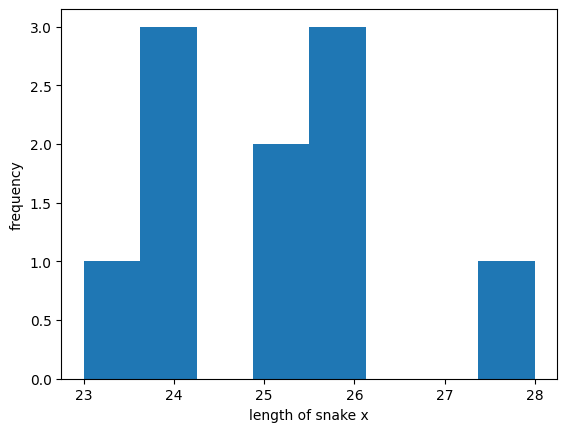

In [2]:
# to make a plot we need to import plotting package
from pylab import plt
# this makes the plot appear in the notebook
%matplotlib inline

# length of snake measurements
x = [26,24,26,28,23,24,25,24,26,25]

# plot the histogram
plt.hist(x,bins=8,histtype='bar')
plt.ylabel('frequency')
plt.xlabel('length of snake x')
plt.show()

The mean in this case would be 

\begin{equation*}
\hat{x} = {\sum_k x_k n_k \over {N}}
\end{equation*}

where $n_k$ is the number of instances that that the measurement $x_k$ was made.  Note that $\sum n_k = N$. 

We can look at this another way, each result $x_k$ occurs a certain fraction of times $F_k$ where, out of 10 measurements, we measured a value of 24 three times ie $F_k = n_k/N$.  The mean would then be 

\begin{equation*}
\hat{x} = {\sum_k x_k F_k}
\end{equation*}

and $\sum_k F_k = 1$.

What if our measurements were not exactly 23 and 24, but were instead 23.6 and 24.3? Our new, more precise, measurements of the length of the snake are 

26.4, 23.9, 25.1, 24.6, 22.7, 23.8, 25.1, 23.9, 25.3, 25.4. 

So we now need to think of distributing them in the following way 

|Bin|22 to 23|23 to 24|24 to 25|25 to 26|26 to 27|27 to 28|
|---|---|---|---|---|---|---|
|Frequency of how many times that length is measured|1|3|1|4|1|0|

where the bin width is denoted as $\Delta_k$, and the area of the bin represents the fraction of measurements that fall within the $k$th bin ie $f_k\Delta_k$.   

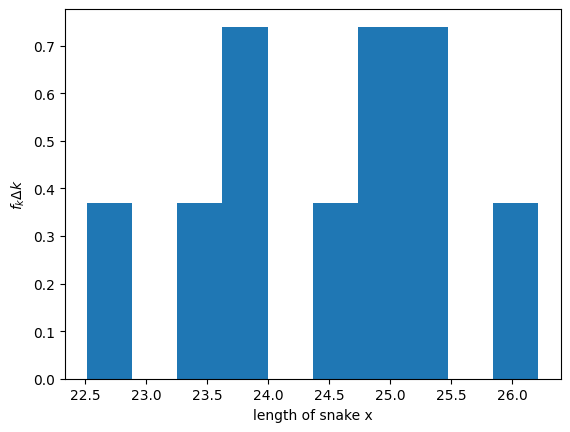

In [3]:
# to make a plot we need to import plotting package
from pylab import plt
# this makes the plot appear in the notebook
%matplotlib inline

# length of snake measurements
x = [26.4,23.9,25.1,24.6,22.7,23.8,25.1,23.9,25.3,25.4]

# get the histogram counts (frequency) and the bin edges from python
hist, bin_edges = np.histogram(x)
# need to work out size of bins as we want to plot freq x bin width on y axis
binWidth = bin_edges[1] - bin_edges[0]

# plot
plt.bar(bin_edges[:-1], hist*binWidth, binWidth)
plt.ylabel('$f_k \Delta k$')
plt.xlabel('length of snake x')
plt.show()

***

## Probability Mass Functions and Probability Density Functions

Up until now, we have only considered the probability of discrete events, such as a coin-flip resulting in heads, or a die turning up a 6.  However, probabilities can also be determined for continuous variables, for example, the probability that a child will be a certain height at a given age, or that the intensity in a spectrum will be a given value, or that a molecule will have a given velocity. In this case, the height $h(\mbox{age})$ or intensity $I(\lambda)$, or velocity $v$, are all **continuous** variables. These are variables that are uncountable.

Not only are there discrete and continuous variables, but even with discrete data, if we have a lot of trials in our experiments, looking at the data can get tedious. In rolling a six-sided die, there were only six possible outcomes so we could write down the entire probability distribution in a table. Similarly it was rather easy to do it for our snake length measurements above.  In many scenarios, the number of outcomes can be much larger and hence a table would be tedious to write down. Worse still, the number of possible outcomes could be infinite, in which case, good luck to anyone writing a table for that!

Now we can start talking about what happens as our number of measurements approaches infinity $N \to \infty$. Two things will happen:
- the distribution of data (our histogram) is said to approach the *limiting distribution* of the variable
- $f_k \to f(x)$ and $\Delta_k \to dx$ so that, whereas before we had $\sum f_k ~ \Delta_k = 1$ for all $k$, now we have

    $\int^{\infty}_{-\infty} f(x)~ dx = 1$
   
     and so the histrogram of the data approaches the **probability mass function** or the **probability density function** (PDF) of the limiting distribution depending on whether the variable is discrete or continuous.  

The **PDF** is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. It therefore gives the density of probability rather than the probability mass. The concept is very similar to mass density in physics: its unit is probability per unit length.
     
Sometimes we don’t know the underlying limiting distribution, but we can make a rough one out of our data.
<br><br>

We can now introduce the formal definition of the mean as $N \to \infty$:

\begin{equation*}
\hat{x} = \sum_k x_k ~ F_k = \sum_k x_k~ f_k ~\Delta_k \to \int^{\infty}_ {-\infty} x ~f(x)~ dx 
\end{equation*}

and similarly for the standard deviation: 

\begin{equation*}
\sigma_x = \sqrt{  \int^{\infty}_ {-\infty} (x-\hat{x})^2 ~f(x)~ dx   }
\end{equation*}

where we don't need to worry about $N$ or $N-1$ in the denominators as we're in the regime where $N \to \infty$.   We therefore formally define the mean as the expected value of a discrete random variable - the probability-weighted average of all its possible values. In other words, each possible value the random variable can assume is multiplied by its probability of occurring, and the resulting products are summed to produce the expected value.

Because we now have this terminology, we can also define the **cumulant** distribution (CDF) where

$F(x') = \int^{x'}_ {-\infty} f(x)~ dx$

where $F(x')$ tells us the percentile that $x'$ represents, eg if $F(x')=0.6$ then 0.6 or 60% of the area under the function $f(x)$ would lie in the range $\le x'$. Note that the lower limit could be any bound over which the distribution is valid.  The CDF returns the expected probability for observing a value less than or equal to a given value. 

The **median** is the special case where $F(x) = 0.5$ - the 50th percentile.  Sometimes (depending on the data) the median is a better estimate than the mean.   

Finally the Probability Percent Function (PPF) is the inverse of the CDF. and gives the value of the variate for which the cumulative probability has the given value.

- **The distribution of a discrete random variable is characterised by its probability mass function.**
- **The distribution of a continuous random variable is characterised by its probability density function.**

### The probability density function is not a probability

The probability mass function (PMF) of a discrete variable $\theta$ is a function that gives you, for any real number $x$, the probability that $\theta$ will be equal to $x$.

However if $\theta$ is a continuous variable, its probability density function (PDF) evaluated at a given point $x$ is **not** the probability that $\theta$ will be equal to $x$. 

The PMF does not work for continuous random variables because for a continuous random variable $P(\theta=x)=0$ for all $x$. Instead, we use the PDF.

### <font color=#4290C4>Example</font>

Let X be a continuous random variable with the following PDF:

$f_X(x) = ce^{-x}$ if $x \ge 0$ or $f_X(x) = 0$ otherwise.

where $c$ is a positive constant.
1. Find $c$.
2. Find the CDF, $F_X(x)$ and plot.
3. Find $P(1<X<3)$.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

1. To find $c$ we use the fact that $\int^{\infty}_{-\infty} f(u)~ du = 1$.  As it is zero for anything other than $x\ge 0$, the limits become:

    $\int^{\infty}_{0} ce^{-u}~ du = 1 \to c\left[ - e^{-u}\right]^{\infty}_0 = 1$
    
    Therefore $c=1$. <br><br>

2. The CDF $F_X(x)$ is given by $F_X(x') = \int^{x}_ {-\infty} f(u)~ du$. This is zero unless $x \ge 0$. So this becomes $F_X(x) = \int^{x}_{0} e^{-u}du \to 1-e^{-x}$. 

    The CDF is then $1-e^{-x}$ if $x \ge 0$ or $F_X(x) = 0$ otherwise. <br><br>

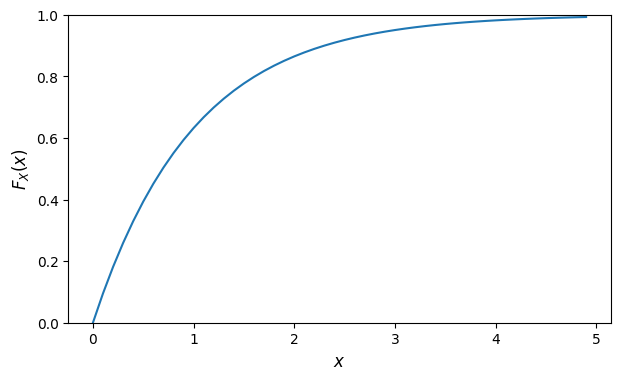

In [4]:
# define the CDF function from part 2 of question
def cdf_F(k):
    if k < 0:
        val = 0.
    else:
        val = 1-np.exp(-k)
    return val

# Plot CDF by deriving the function for the CDF first and plotting that
x = np.arange(0,5,0.1)
cdf = [cdf_F(item) for item in x]

plt.figure(figsize=(7,4))
plt.plot(x,cdf)
plt.ylim(0,1)
plt.xlabel('$x$',fontsize=12)
plt.ylabel('$F_X(x)$',fontsize=12)
plt.show()

Note that if $X$ had been a discrete variable we could have simply used the `numpy` `cumsum()` function on the outputs of $f_X(x)$ (the PDF) to get the CDF function.

3. We can calculate $P(1<X<3)$ using the PDF or the CDF.  Using the PDF we would do the following:

    $P(1<X<3) = \int^3_1 f(u)du \to \int^3_1 e^{-u}du \to e^{-1} - e^{-3}$. <br><br>
    
    Using the CDF, we would instead do:
    
    $P(1<X<3) = F_X(3) - F_X(1) = 1-e^{-3} - (1 - e^{-1}) \to e^{-1} - e^{-3}$ - they give the same answer.
    

*Question from this [site](https://www.probabilitycourse.com/chapter4/4_1_1_pdf.php).*

### Introduction to the idea of Maximum likelihood 

Maximum likelihood is the idea is that the best guess for the values of $x_0$ and $\sigma$ are those that maximise the probability. Given $N$ observed measurements $x_1,...,x_N$, the best estimates for the mean and standard deviation are those values for which the observed $x_1,...,x_N$ are most likely, or rather where $p_{\hat{x},\sigma}(x_1,...,x_N)$ is the maximum.

Why do statitiscians use maximum likelihood and not maximum probability?

The likelihood is formally written as 

$\mathcal{L}(\mu,\sigma | \mbox{data})$

where this is the likelihood that the parameters $\mu$ and $\sigma$ (mean and std) take on certain values given the data we've observed.

However probability is usually written as 

$P(\mbox{data} | \mu,\sigma)$

ie the probability (or probability density) of observing data with model parameters $\mu$ and $\sigma$.

One is asking about the data and the other (maximum likelihood) is asking about the parameter values.


***

## The Normal Distribution

The central limit theorem states that if a quantity is subject to many **small, but independent, random processes**, the spread of the quantity can be described by a bell-like curve, known as a Gauss function or normal distribution.   This is a continuous probability distribution.  This distribution is possibly the most important distribution in probability theory as it describes natural phenomena such as people's weights, heights and so on.
 
The form of the normal distribution with width $\sigma$, for data value $x$ centred on a value of $x$ given by $x_0$

$N_{x_0, \sigma}(x) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-(x-x_0)^2/2\sigma^2}.$

We can show that the mean of the normal distribution is simply 

$\hat{x} = x_0$

and the standard deviation of the data that follow a normal distribution is

$\sigma_x = \sigma$.

The central limit theorem means that as we get more and more data of say, our snake's length, then the averages of random variables behave like normally-distributed random variables regardless of their limiting distribution. Practically, a sample size of 30 or more is considered large.

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter3/normal_n.png" width="400">

**An important comment**: the mean itself is a random variable. This is because our averages are based on a sample and it is impossible to sample every snake in the world for example. Every time we take a new sample of measurements, our average will be different from our previous ones.  

This is where something like the normal distribution becomes very important — if we take a lot of samples, then the mean of our sample means would itself look like a normally distributed random variable.  

The figure below (taken from [here](https://clauswilke.com/dataviz/visualizing-uncertainty.html)) shows what we mean by sampling statistics and population. The snake length has a true distribution (population) with population means and standard deviations.  Our sample of experimental data has a sample mean and a sample standard deviation which differ from the population parameters. If we keep taking data and recalculate the mean, they would be distributed also as a normal.   The standard error of this distribution informs us how precisely we are measuring the true snake length (the population mean).

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter3/sampling.png" width="700">


What does this mean? Well, even for relatively small samples we can make some inferences about the populations (eg the length of snakes) using the normal distribution and our sample statistics.

#### Derivation

How did we get the above result?

We first have to normalise the function to use it as a probability, such that it satisfies,

$\int_{-\infty}^{\infty} N(x) dx = 1$ 

We introduce a constant $C$, such that,

$N(x) = C\, e^{-(x-x_0)^2/2\sigma^2}.$

Note that $C$ only serves to the move the curve up an down in $y$, but leaves the shape and centring undisturbed; it obviously changes the area under the curve though, which is the whole point in the normalisation. To evaluate the integral, we make a change of variable, by setting $(x - x_0)/\sigma = z$, such that $dx = \sigma dz$ to get,

$\int_{-\infty}^{\infty} N(z) dz = C\sigma\, \int_{-\infty}^{\infty} e^{-z^2/2} dz$

This is a standard integral in physics, and has the result,

$\int_{-\infty}^{\infty} e^{-z^2/2} dz = \sqrt{2\pi},$

which yields the value for the normalisation $C = 1/ \sigma\sqrt{2\pi}$. We can then write the final form for the normal distribution as,

$N_{x_0, \sigma}(x) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-(x-x_0)^2/2\sigma^2}$

Then we know that the mean of a PDF is 

$\hat x = \int_{-\infty}^{\infty} x\,N_{x_0, \sigma}(x) dx =  \dfrac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} x\, e^{-(x-x_0)^2/2\sigma^2} dx.$

Again, this can be evaluated with a change of variables, replacing $x - x_0 = y$, such that $dx = dy$ and $x = y + x_0$. This results in,

$\hat x =  \dfrac{1}{\sigma\sqrt{2\pi}} \left( \int_{-\infty}^{\infty} y \,e^{-y^2/2\sigma^2} dy ~ + ~ x_0 \int_{-\infty}^{\infty} e^{-y^2/2\sigma^2} dy    \right).$

The first integral is zero, since although the exponential term is symmetric about $y = 0$, the $y$ is not, and so the points from $-y$ are exactly cancelled by those from $+y$. The second integral is the same as that we seen above, and is just $\sigma \sqrt{2\pi}$, which cancels with the term at the front, leaving us with,

$\hat x = x_0$.

Similarly for the standard deviation:

$\sigma_x^2 =  \int_{-\infty}^{\infty} (x - \hat{x})^2 N_{x_0, \sigma}(x) dx$.

By noting that $\hat{x} = x_0$, and then by making the substitutions $x - x_0 = y$, and $y/\sigma = z$ gives,

$\sigma_x^2 = \sigma^2$.

### Probabilities from Normal distributions

Since $N_{x_0, \sigma}(x)$ is a PDF, the probability of $x$ lying in the range $a$ to $b$ is then given by,

$\int_a^b  N_{x_0, \sigma}(x) dx.$

So what about the probability of lying within $\pm t \sigma$ eg 1, 2 or 3$\sigma$, where $t$ is some real (positive) number? This is given by,

$P(\rm{within} ~t \sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} \int_{x_0 - t\sigma}^{x_0 + t\sigma} e^{-(x - x_0)^2/2\sigma^2} dx.$

Once again, substitution of $(x-x_0)/\sigma = z$, with $dx = \sigma dz$ and now limits of $-t$ to $t$, we have,

$P(\rm{within} ~t \sigma) = \dfrac{1}{\sqrt{2\pi}} \int_{-t}^{+t} e^{-z^2/2} dz.$

The equation above is known as the *error function*.  Unfortunately, it can not be evaluated analytically, however using a computer, it is possible to obtain values for the integral as a function of $t$, and we can use reference tables to look this up.  

|t |0.25 | 0.5 | 0.75 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 3.5 | 4.0 |
|---|---|---|---|---|---|---|---|---|---|---|
|$P ~\mbox{within}~ t\sigma$|  0.2 | 0.38 | 0.55 | 0.68 | 0.87 |0.954 | 0.988 | 0.997 | 0.9995 | 0.9999|


We can use this information for data that is independent and random, to state our best esimtate of the value as the mean and an error on that value as $X\sigma$ with an associated probability.  For example, the probability that a measurement lies within $1\sigma$ of the mean is 68%. 

$P(\mu -1\sigma < X < \mu + 1\sigma) \sim 0.6827$ 

$P(\mu -2\sigma < X < \mu + 2\sigma) \sim 0.9545$

$P(\mu -3\sigma < X < \mu + 3\sigma) \sim 0.9973$

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter3/normal_distribution.png" width="400">

*Normal distribution figures are taken from [here](https://medium.com/@kr151ranjan/fundamental-of-statistics-central-limit-theorem-a9ead27a5b91)*.

A good reference for other distributions that are commonly used in data analysis can be found [here](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03).

### <font color=#4290C4>Example</font>

You order pizza from your favourite place and want to know how long it will take. The restaurant states it has an average (mean) delivery time of 30 minutes with a standard deviation of 5 minutes. Estimate the range of delivery times for 68% of the deliveries.  Do the same for 95 and 99.7%.  

###  <font color=#c38241> Solution</font>

Click below for the solution.

So delivery times are on average $30 \pm 5$ minutes. Now how to match that to a probability?

Using the table above, we can immediately determine that:
- 68% of the delivery times will be between 25-35 minutes ($30 \pm 5$) 
- 95% are between 20-40 minutes ($30 \pm (2 \times 5)$) 
- 99.7% are between 15-45 minutes ($30 \pm (3 \times 5)$). 

### <font color=#4290C4>Example</font>

At a facility that manufactures electrical resistors, a statistical sample of 1 k$\Omega$ resistors is pulled from the production line. The resistor's resistances are measured and recorded. A mean resistance of 979.8 k$\Omega$ and a standard deviation of 73.10 k$\Omega$ represents the sample of resistors. The desired resistance tolerance for the 1-k$\Omega$ resistors is $\pm$ 10%. This tolerance range means the acceptable range of resistance is 900 to 1100 $\Omega$. 

Assuming a normal distribution, show the probability that a resistor picked off the production line is within the desired tolerance on a plot.

###  <font color=#c38241> Solution</font>

Click below for the solution.

As we are interested in the probability, we use the equation above

$P(\rm{within} ~t \sigma) = \dfrac{1}{\sqrt{2\pi}} \int_{-t}^{+t} e^{-z^2/2} dz.$

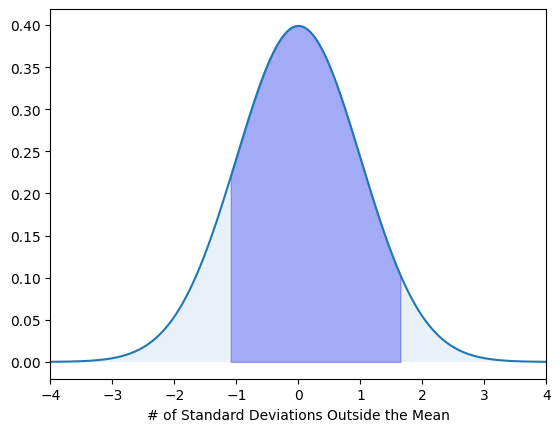

In [5]:
import numpy as np
import pylab as plt
# install packaged to do a normal function
from scipy.stats import norm

%matplotlib inline

# define constants
mu = 979.8     
sigma = 73.10

# acceptable values of resistance
x1 = 900
x2 = 1100

# calculate the z-transform x - x_o /sigma
# this will move x axis to +/- sigmas rather than resistance
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

# range of x in spec 
x = np.arange(z1, z2, 0.001) 

# plot distribution for +/1 10 sigma as comparison
x_all = np.arange(-10, 10, 0.001) 

# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

# build the plot
plt.plot(x_all,y2)

# this shows dark shaded region for acceptable values of resistor
plt.fill_between(x,y,0, alpha=0.3, color='b') 
# this gills in the gap between the PDF and the accepted values
plt.fill_between(x_all,y2,0, alpha=0.1)
plt.xlim([-4,4])
plt.xlabel('# of Standard Deviations Outside the Mean')
plt.show()

Notice how the area corresponding to resistors in the given specification (between the upper and lower bounds) is shaded.

***

## Bernoulli Distribution

A Bernoulli event is one in which the outcomes are of the yes/no variety, such as, did the coin land heads? Did the patient survive 3 years after treatment?  Due to the widely applicable nature of this type of event, Bernoulli distributions are a common feature of statistics and data analysis. This is a discrete probability distribution.


Let's flip a coin 5 times and see how many tails we get.  Let's denote and a success (tail) as 1, and a fail (head) as 0. Each trial has probability 0.5 of success and 0.5 of failure. We might be interested in knowing what is the probability of obtaining a given number of successes. How shall we proceed?

The figure below shows us an example of the outcomes from 1 trial of flipping the coin 5 times and got $\Omega = {H,H,H,T,T}$.   If we assign 0s and 1s then we have the following:

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter3/bernoulli.png" width="600">

So in this case the probability of getting the above outcomes would be (if independent) $p^2(1-p)^3$ or rather $p^{\nu}(1-p)^{N-\nu}$ where $N$ is number of coins flipped and $\nu$ is the number of successes.

If our probability of success in one trial is represented by $\theta$, we can then write the probability of success in $p$ given $\theta$ as,

$p(x|\theta) = \theta^x(1 − \theta)^{(1−x)}$.

where $x= 0$ for failure, or $1$ for success. Eg for rolling a six with a fair dice, $x=1$ for rolling a 6, and 0 for anything else. In this case the probability for rolling a six in one trial $\theta$ would be 1/6.

We can write the probability of obtaining any particular sequence of successes for $\nu =$ number of successes 

$p(\nu|N, \theta) = \theta^{\nu} (1 − \theta)^{(N−\nu)}$

### <font color=#4290C4>Example</font>

M&M's created in the US have 50% red sweets, whereas those created in the UK only have 30% red M&Ms. You draw 5 M&Ms from an unlabeled bag and find that 2 are red.  Use maximum likelihoods to find out which country your M&Ms came from.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

Probability distribution is a Bernoulli with successes 2, trials 5. The probability of getting a red M&M in one trial is $\theta= 0.3$ for the UK and 0.5 for the US. Likelihood can be written as:

$\mathcal{L}(p|x) = \theta^{\nu}(1-\theta)^{N-\nu} $

In [6]:
import math
theta = [0.3,0.5] #prob red M&Ms in UK, prob red M&Ms in US
N=5  # No of trials
nu=2 # No of successes

lik = [x**nu * (1-x)**(N-nu) for x in theta]

print('likelihood for theta=0.3 and theta=0.5 is {:.5f} and {:.5f}'.format(lik[0],lik[1]))

likelihood for theta=0.3 and theta=0.5 is 0.03087 and 0.03125


$\mathcal{L}(0.5|x) > \mathcal{L}(0.3|x)$ therefore more likely bag came from the US.

***

## The Binomial Distribution

Binomial distribution is a discrete probability distribution like Bernoulli. It can be used to obtain the number of successes from $N$ Bernoulli trials.

Let's consider rolling 3 dice at the same time. What is the probability of getting $\nu$ sixes, where now $\nu = \{0, 1, 2, 3\}$?  First, consider $\nu = 0$,

$p(\rm{not~ 6, not ~6, not~ 6}) = \left( \dfrac{5} {6} \right)^3$
and then consider $\nu = 3$,

$p(\rm{6, ~6,~ 6}) = \left( \dfrac{1} {6} \right)^3.$

These were the most straightforward as there is only 1 way in which they can occur. But now let's consider ($\nu = 1$). This can occur in 3 ways:

\begin{align}
p(\rm{one ~6 ~in~ 3}) & =  p(\rm{6, not ~6, not ~6}) +  p(\rm{not~ 6, 6, not ~6}) + p(\rm{not ~6, not~ 6,~ 6}) \\
                                      & =  3 \left( \dfrac{1} {6} \right) \left( \dfrac{5} {6} \right)^2.
\end{align}

Similarly for $\nu = 2$:

\begin{align}
p(\text{two 6 in 3}) & =  p(\text{6, 6, not 6}) +  p(\text{6, not 6,  6}) + p(\text{not 6, 6, 6}) \\
                                      & =  3 \left( \dfrac{1} {6} \right)^2 \left( \dfrac{5} {6} \right).
\end{align}

The coefficients that sit in front of the $\theta$ and $\theta -1$ terms are given by the Binomial Coefficient,


\begin{align}
{N \choose \nu} & = \dfrac{N(N-1) \dotsb (N - \nu + 1)}  {1 \times 2 \times \dotsb  \times \nu} \\
                                      & = \dfrac{N!} {\nu!(N - \nu)!}
\end{align}

The *Binomial Distribution* is therefore,


$B_{N, \theta} (\nu) = {N \choose \nu} \theta^\nu (1 - \theta)^{(N - \nu)}.$

The mean of the Binomial Distribution are given by,

\begin{align}
\hat{\nu} & = \sum \nu B_{N, \theta} (\nu) \\
& = N \theta,
\end{align}

that is, if you repeat the experiment $N$ times, the average number of successes is simply the probability of success in any one trail times the number of trials. The standard deviation is little trickier to evaluate, but is given by,

$\sigma_{\nu} = \sqrt{N\theta(1 - \theta)}.$

You can get access to python's inbuilt binomial calculator by using `scipy.stats`. As it is a discrete probability distribution, the python function is called `binom.pmf()`.

**The binomial distribution approaches the normal distribution as $N \to \infty$.**

### <font color=#4290C4>Example</font>

Suppose a dice is tossed 5 times. What is the probability of getting exactly 2 fours?

###  <font color=#c38241> Solution</font>

Click below for the solution.

This is a binomial experiment in which the number of trials is equal to 5, the number of successes is equal to 2, and the probability of success on a single trial is 1/6.  The binomial distribution is given by

$B_{N, \theta} (\nu) = {N \choose \nu} \theta^\nu (1 - \theta)^{(N - \nu)}.$

In [7]:
from scipy.stats import binom

# set up values
N=5
nu = 2

# prob of single trial
theta = 1./6

prob = binom.pmf(nu,N, theta)

print('probability of getting exactly 2 fours when tossing dice 5 times is {:.2f}'.format(prob))

probability of getting exactly 2 fours when tossing dice 5 times is 0.16


***

## Beta Distributions

The functional family that has the same form as Bernoulli and Binomial distributions are called *beta distributions*. These are suitable for describing the random behavior of percentages and proportions. One example is where a scientists believes that the (unknown) probability of having flu is not fixed and not the same for the entire population, but is another random variable with its own distribution. The probability density function is (usually) denoted by,

$p(\theta | ~a, b) = \rm{beta}(\theta | a, b) =  \dfrac{ \theta^{(a - 1)} (1 - \theta)^{(b - 1)} }{B(a, b)}$

where $a$ and $b$ are shape paramaters and $B(a, b)$ is the normalisation factor that ensures that the area under the curve integrates to unity,

$B(a, b) = \int_0^1 \theta^{(a - 1)} (1 - \theta)^{(b - 1)} d\theta.$

The mean and variance of the beta distribution are given by,

$\hat{\theta}_{B} = \dfrac{a}{a+b}$

$\sigma_{\sigma}^2  = \dfrac{ \hat{\theta}(1 - \hat{\theta})}  {a + b + 1}.$


### <font color=#4290C4>Example</font>

Let's plot some beta distributions for different values of $a$ and $b$, we can import beta function from `scipy.stats`.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

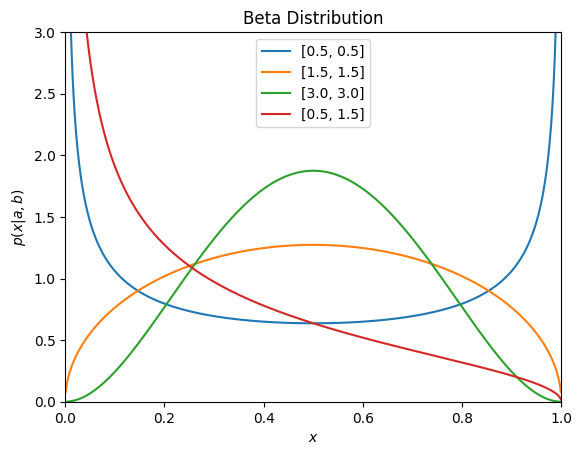

In [8]:
from scipy.stats import beta

# let's do it for 4 different parameters of a and b

a = [0.5, 1.5, 3.0, 0.5]
b = [0.5, 1.5, 3.0, 1.5]

# list indexing, example [:}] returns all elements and [:-1] returns all except the last one [:-1]
x = np.linspace(0, 1, 1002)[1:-1]

for i in range(0,len(a)):
    dist = beta(a[i],b[i])
    plt.plot(x, dist.pdf(x),label=[a[i],b[i]])
plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|a,b)$')
plt.title('Beta Distribution')
plt.legend()
plt.show()

We can see that as $a$ gets larger, the distribution moves to high values of $x$ (ie $\theta$), while as $b$ increases, the distribution moves to lower values of $x$ (ie $\theta$). If $a$ and $b$ get larger together, the beta distribution becomes narrower.

***

## The Poisson Distribution

The Poisson Distribution is the limiting distribution that describes processes that are random but are governed by some underlying mean rate. Examples include monitoring the decay of radioactive materials, or in sociology, the rate of births/deaths over winter and so on.  If football were a Poisson process with a mean number of goals per game of, say, 2 then we would expect football games to have $2 \pm 1.4$ (the square root of 2) goals, i.e. between about 0.6 and 3.4 goals per match. That is actually not far from what is observed and the distribution of goals per game in football matches is actually quite close to a Poisson distribution.

The Poisson Distribution is given by,

$P_\mu(\nu) = e^{-\mu} \, \dfrac{\mu^\nu} {\nu!}$

where $\mu$ is the mean count rate, and $P_\mu(\nu)$ stands for the the probability of $\nu$ successes (counts) in a specific interval.

The standard deviation of the Poisson Distribution is given by
$\sigma_{\nu} = \sqrt{\mu}$.

This is neat result: if we measure a given number of counts $\hat{\nu}$ in a given interval, then the uncertainty on our count rate is simply $\sqrt{\hat \nu}$.

Note that the Poisson Distribution is *not* symmetric about the mean.

The Poisson distribution approaches the Binomial Distribution when the number of trials is very large (think atoms in a lump of Uranium), but the probability $\theta$ is very small (the chances of a single atom decaying in a hour).

**The Poisson distribution approaches the normal distribution as $\mu \to \infty$.**

### <font color=#4290C4>Example</font>

Let's plot some example Poisson distributions.  Again we can use `scipy.stats` to help us use Poisson distribution, calling the function `poisson.pmf()`.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

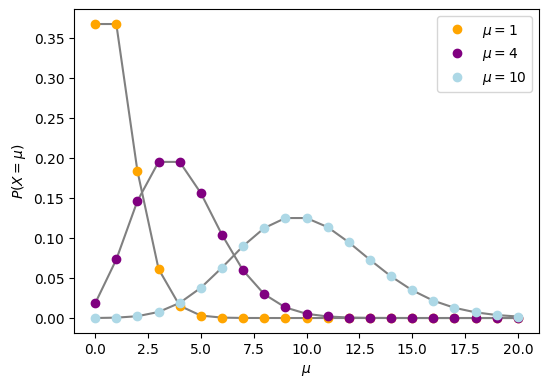

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.stats import poisson

X = np.arange(0,21)

# let's plot 3 curves with different mu values

col = {1: 'orange', 4: 'purple', 10: 'lightblue'} # define colours for lines
labels = {1: "$\mu=1$", 4: "$\mu=4$", 10: "$\mu=10$"} # define labels for lines

plt.figure(figsize=(6,4.2))

for mu in 1,4,10:
    P = poisson.pmf(X,mu)
    
    plt.plot(X, P, '-', color='grey')
    a = plt.plot(X, P, 'o', color=col[mu], label = labels[mu])
    plt.legend()

plt.xlabel("$\mu$")
plt.ylabel(r"$P(X=\mu)$")
plt.xlim(-1,21)
plt.show()

### <font color=#4290C4>Example</font>

Suppose that astronomers estimate that large meteorites (above a certain size) hit the earth on average once every 100 years, and that the number of meteorite hits follows a Poisson distribution. What is the probability of zero meteorite hits in the next 100 years?

###  <font color=#c38241> Solution</font>

Click below for the solution.

Poisson distribution given by

$P_{\mu}(\nu) = e^{-\mu} \dfrac{\mu^{\nu}}{\nu !}$

where $\nu=0$ and $\mu = 1$

$P(k={\rm{0~ meteorites ~hit ~in ~next~ 100~ years}})={\dfrac{1^0e^{-1}}{0!}}=\dfrac {1}{e}$

In [10]:
import numpy as np

mu = 1 # mean = once every 100 years
nu = 0 # number of successes

prob = (np.exp(-mu) * mu**nu) / 1.
print('The probability that no large meteorites hit the earth in the next 100 years is {:.2f}.'.format(prob))

The probability that no large meteorites hit the earth in the next 100 years is 0.37.


***

## Exponential Distribution

You may have noticed in the news that the exponential functions have been getting a lot of attention recently due to its description of the evolution of infection rates in pandemics. 

In probability, an exponential probability distribution is effectively a "waiting time" distribution - how long do we have to wait before the next event ie bus, infection etc?

The form of the PDF for this distribution is $\lambda {\rm exp}(-\lambda t)$. In this case $\lambda$ is the mean number of events over a given interval.  We can see then that this function is the probability distribution of the *time between events* in a Poisson point process.

The mean is given by $\dfrac{1}{\lambda}$ and variance $\dfrac{1}{\lambda^2}$.

As an aside, this is different to the exponential growth function that has been in the news so much where $y=a{\rm exp}^{\lambda t}$. In the COVID-19 pandemic, it was quickly realised that without intervention, the number of new Covid-19 cases would double every three to four days. It is difficult for our brains to understand just how bad an exponential increase like this is as we're so used to thinking linearly.

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter3/covid.png" width="600">

The figure above shows the total number of confirmed cases of COVID-19 in the UK increasing exponentially during early 2020. *Credit: Max Roser, Hannah Ritchie and Esteban Ortiz-Ospina (2020) - 'Coronavirus Disease (COVID-19) – Statistics and Research'* 

To see the real danger in an exponential infection rate, imagine if 1 person is infected on day 1 and then the number of infected people doubles every 3 days.   How many would be infected in 60 days?

In [11]:
def exp_growth(a,l,t):
    return a*np.exp(l*t)

# want to know some time later in days
t = 60
t_r = 1./3*t # doubles every 3 days

y_0 = 1. # initially (on day 0) only this many infected = a
y_2 = 2*y_0   # in X days the rate increases by a factor of 2 (doubles)

# need to work out lambda using the fact we know that y = 2 for a time of 2 days
l = (np.log(y_2/y_0))

# now how many in 60 days?
y_60 = exp_growth(y_0,l,t_r)

print('The number infected after '+str(t)+' days is {:.2f}'.format(y_60/1e6)+' million people')


The number infected after 60 days is 1.05 million people


### <font color=#4290C4>Example</font>

Back to the exponential probability function. Let's say that on average, the number of shoppers arriving in store are 50 customers per hour.  The mean interval between events (one customer to another) is 0.83 customers per minute.

What is the probability that a customer will come into the store in the next minute?

###  <font color=#c38241> Solution</font>

Click below for the solution.

To do this we need to integrate the PDF (to get the CDF - remember PDF not in probability units but in probability density units) and plug in the values of 1 minute and $\lambda=0.83$.

$P(t<1 \mbox{min}) = \int^1_0 0.83~ e^{-0.83t}dt$

$ = \left[ -e^{-0.83t}\right]^1_0$

$= 1 - e^{-0.83 t}$

In [12]:
# function that calculates probability for exponential from the CDF (integral of PDF)
def cdf_exp(l,t):
    return 1-np.exp(-l*t)

t = 1.0 # time
l = 0.83 # mean rate of customers per minute

print('Probability that customer arrives in store in next minute is {:.2f}'\
      .format(cdf_exp(l,t)))

Probability that customer arrives in store in next minute is 0.56


***

## Marginalisation

What do we do if the PDF is a function of more than one variable?

There may exist a function $p(x, y)$ that yields the probability of both $x$ and $y$. This type of function may even be a combination of discrete and continuous variables and will have units of $1/xy$. But suppose we wanted to know just $p(x)$. How do we calculate this, given that we only have $p(x, y)$? If you consider the units of the problem, the answer becomes clear: we just need to integrate or sum over $y$, i.e.

$p(x) = \int p(x, y) dy$

if $y$ is a continuous variable, or

$p(x) = \sum_y p(x, y)$

if $y$ is discrete. This process is called *marginalising over y*. We could do the same to get $p(y)$. Marginalisation is extremely important, since it allows us to deal with nuisance parameters, that is, those that we don't know very well (or that are not well constrained).

### <font color=#4290C4>Example</font>

Scientists have measured someone’s happiness and also recorded the weather for in England, Wales and Scotland. We want to know if weather affects happiness.  

We can write this mathematically as $P(\mbox{happiness} | \mbox{weather})$ but what we've measured is the following

$P(\mbox{happiness}, \mbox{country | weather} )$

ie we can't simply just get rid of the fact that the happiness will be a function of both nationality and weather. How do we approach this?

###  <font color=#c38241> Solution</font>

Click below to see the solution.

Marginalisation tells us that we can calculate the quantity we want if we simply sum over all possibilities of countries ie 

$P(\mbox{happiness} | \mbox{weather}) = P(\mbox{happiness}, \mbox{Wales | weather} )
 + P(\mbox{happiness}, \mbox{England | weather}) + P(\mbox{happiness}, \mbox{Scotland | weather} )
$

*Example from [here](http://www.inf.ed.ac.uk/teaching/courses/cfcs1/lectures/joint.pdf).*

***

Now you are ready to tackle the **Chapter 3 quiz** on Learning Central and the [Chapter 3 yourturn notebook](https://github.com/haleygomez/Data-Analysis-2024/blob/master/blended_exercises/Chapter3/Chapter3_yourturn.ipynb).